# Recurrent Neural Network (RNN) 
## What Is a Neural Network?
A Neural Network consists of different layers connected to each other, working on the structure and function of a human brain. It learns from huge volumes of data and uses complex algorithms to train a neural net.
### Several neural networks can help solve different business problems. Let’s look at a few of them.

- Feed-Forward Neural Network: Used for general Regression and Classification problems.
- Convolutional Neural Network: Used for object detection and image classification.
- Deep Belief Network: Used in healthcare sectors for cancer detection.
- RNN: Used for speech recognition, voice recognition, time series prediction, and natural language processing

## What Is a Recurrent Neural Network (RNN)?
RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.<br>

Below is how you can convert a Feed-Forward Neural Network into a Recurrent Neural Network:<br>
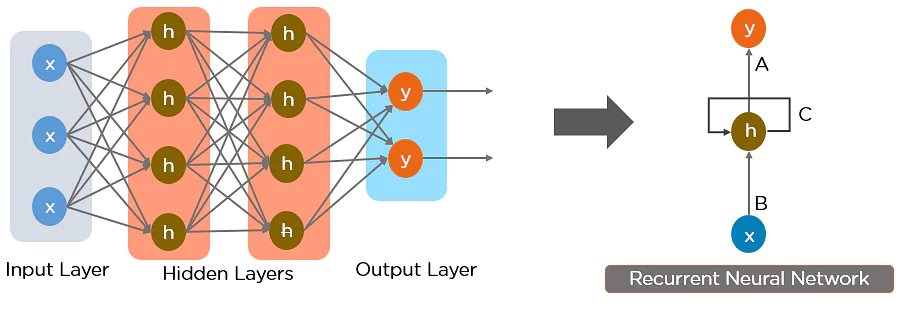
The nodes in different layers of the neural network are compressed to form a single layer of recurrent neural networks. A, B, and C are the parameters of the network.
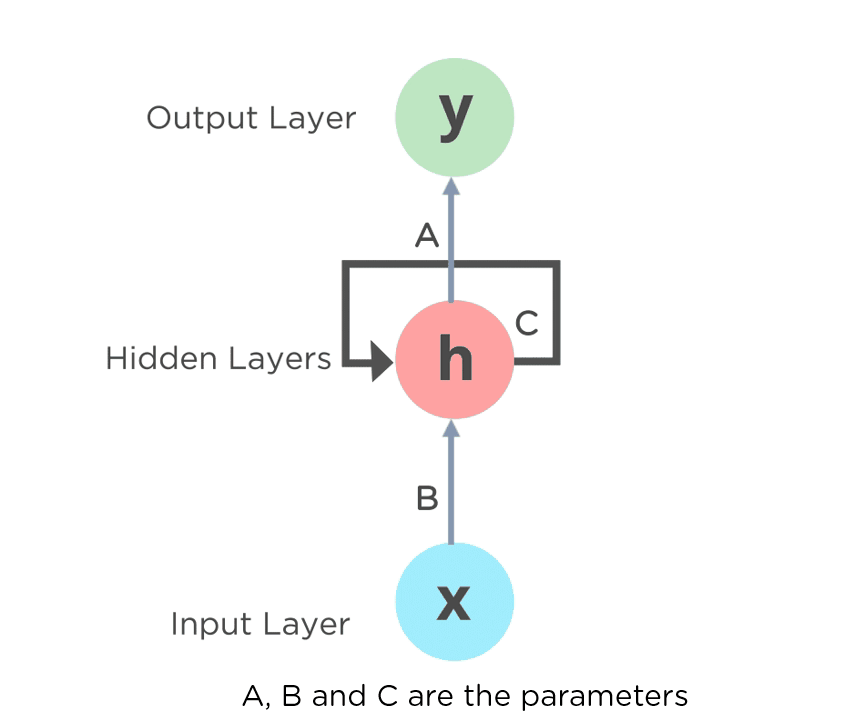
Here, “x” is the input layer, “h” is the hidden layer, and “y” is the output layer. A, B, and C are the network parameters used to improve the output of the model. At any given time t, the current input is a combination of input at x(t) and x(t-1). The output at any given time is fetched back to the network to improve on the output.
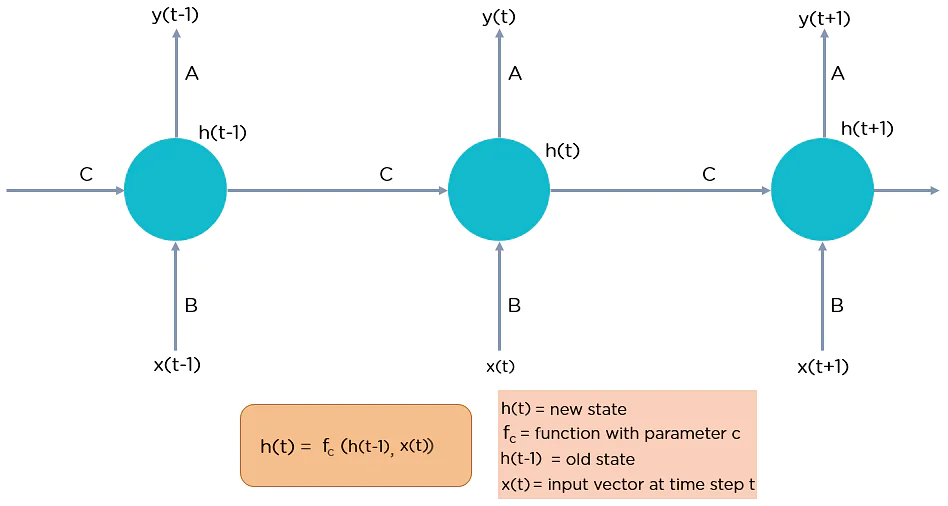
### Why Recurrent Neural Networks?
RNN were created because there were a few issues in the feed-forward neural network:

- Cannot handle sequential data
- Considers only the current input
- Cannot memorize previous inputs<br>
The solution to these issues is the RNN. An RNN can handle sequential data, accepting the current input data, and previously received inputs. RNNs can memorize previous inputs due to their internal memory.

### Types of Recurrent Neural Networks
There are four types of Recurrent Neural Networks:

1. One to One
2. One to Many
3. Many to One
4. Many to Many

#### One to One RNN
This type of neural network is known as the Vanilla Neural Network. It's used for general machine learning problems, which has a single input and a single output.
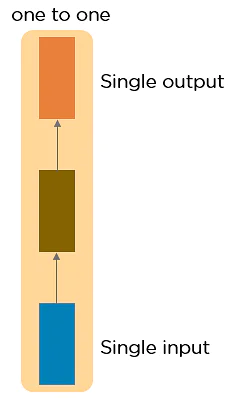
#### One to Many RNN
This type of neural network has a single input and multiple outputs. An example of this is the image caption.

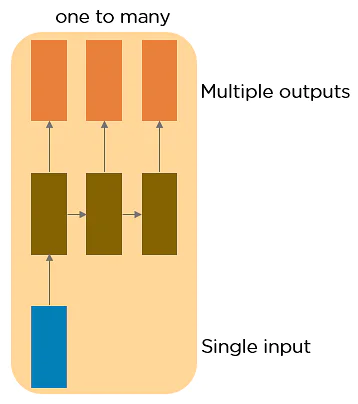
#### Many to One RNN
This RNN takes a sequence of inputs and generates a single output. Sentiment analysis is a good example of this kind of network where a given sentence can be classified as expressing positive or negative sentiments
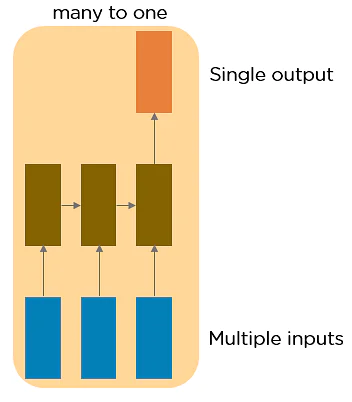
#### Many to Many RNN
This RNN takes a sequence of inputs and generates a sequence of outputs. Machine translation is one of the examples.
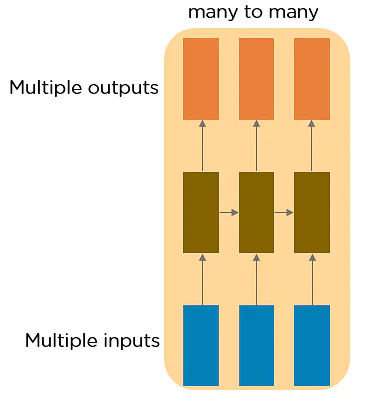

In [1]:
#importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [2]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [3]:

wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[ 0.29723573 -0.56144285]]  wh =  [[ 0.8319    -0.5549258]
 [-0.5549258 -0.8318999]]  bh =  [0. 0.]  wy = [[ 0.990564  ]
 [-0.02022576]] by =  [0.]


In [4]:

x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)
 
 
m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by
 
print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)
 
print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

h1 =  [[ 0.29723573 -0.56144285]] h2 =  [[ 1.15330098 -0.82076524]] h3 =  [[ 2.30660207 -1.64153052]]
Prediction from network  [[2.318038]]
Prediction from our computation  [[2.31803816]]


# RNN stock market

In [111]:
#Import the necessary data science libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [112]:
#Import the data set as a pandas DataFrame

df = pd.read_csv('stock market.csv',error_bad_lines=False)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
 5   Volume  61 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


In [115]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [116]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [117]:
y=df[['Close']]
y

,Close
0,794.200012
1,796.419983
2,794.559998
3,791.260010
4,789.909973
...,...
56,845.539978
57,845.619995
58,847.200012
59,848.780029


In [118]:

X = df.loc[:,['Date', 'Open', 'High', 'Low', 'Volume']]

In [119]:
from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()

num_features = ['Open', 'High', 'Low', 'Volume']

norm_data = rescale.fit_transform(df.loc[:,num_features])

print(norm_data.shape, type(norm_data))

(61, 4) <class 'numpy.ndarray'>


In [120]:
a=['Close']
y_norm=rescale.fit_transform(y[a])

In [122]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(norm_data,y_norm, train_size=0.8, \
                                                    random_state=0)

print(X_train.shape)
print(y_train.shape)

(48, 4)
(48, 1)


In [123]:
X_train

array([[0.60728063, 0.64131947, 0.66812318, 0.37397812],
       [0.34587907, 0.39252298, 0.40899675, 0.23481098],
       [0.68475253, 0.71466971, 0.75919208, 0.13797736],
       [0.75604379, 0.73251182, 0.77222989, 0.12062944],
       [0.06208818, 0.04460442, 0.11095187, 0.04559585],
       [0.39903835, 0.37312345, 0.43155191, 0.21143734],
       [0.28695079, 0.26748733, 0.32385949, 0.21139896],
       [0.66126405, 0.65278928, 0.67783628, 0.1851468 ],
       [0.28667581, 0.26069066, 0.27092602, 0.53728651],
       [0.68475253, 0.71750193, 0.75541061, 0.23960852],
       [0.88557751, 0.87977837, 0.90078248, 0.41362502],
       [0.38832451, 0.3449446 , 0.390613  , 0.28109768],
       [0.89052237, 0.9127721 , 0.91773147, 0.06006525],
       [0.4924448 , 0.46813934, 0.38318136, 1.        ],
       [0.35975284, 0.35924663, 0.40365081, 0.16676262],
       [0.16304941, 0.21353663, 0.22486319, 0.06359624],
       [0.33214281, 0.32880165, 0.390613  , 0.32124352],
       [0.38914865, 0.34848467,

In [127]:
#Importing our TensorFlow libraries

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

In [128]:
i=(df_train.shape[1], 1)
i

(4, 1)

In [129]:
df_train.shape[1]

4

In [131]:
#Initializing our recurrent neural network

rnn = Sequential()

#Adding our first LSTM layer

rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (df_train.shape[1], 1)))

#Perform some dropout regularization

rnn.add(Dropout(0.2))

#Adding three more LSTM layers with dropout regularization

for i in [True, True, False]:

    rnn.add(LSTM(units = 45, return_sequences = i))

    rnn.add(Dropout(0.2))
    

#(Original code for the three additional LSTM layers)

# rnn.add(LSTM(units = 45, return_sequences = True))

# rnn.add(Dropout(0.2))

# rnn.add(LSTM(units = 45, return_sequences = True))

# rnn.add(Dropout(0.2))

# rnn.add(LSTM(units = 45))

# rnn.add(Dropout(0.2))

#Adding our output layer

rnn.add(Dense(units = 1))

In [132]:
#Compiling the recurrent neural network

rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [79]:
#as empty Python lists
    

#Transforming our lists into NumPy arrays



In [133]:
#Training the recurrent neural network

rnn.fit(X_train, y_train, epochs = 100, batch_size = 60)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.3469
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.3356
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 0.3238
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.3119
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 0.2997
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 0.2852
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2720
Epoch 8/100
1/1 [==============================] - 0s 35ms/step - loss: 0.2605
Epoch 9/100
1/1 [==============================] - ETA: 0s - loss: 0.241 - 0s 30ms/step - loss: 0.2412
Epoch 10/100
1/1 [==============================] - 0s 30ms/step - loss: 0.2199
Epoch 11/100
1/1 [==============================] - 0s 35ms/step - loss: 0.2026
Epoch 12/100
1/1 [==============================] - 0s 27ms/step - loss: 0.1871
Epoch 13/100
1/1 [=========

In [134]:
prediction_score = rnn.evaluate(X_test, y_test, verbose=0)

print('Test Loss', prediction_score)

Test Loss 0.005795120727270842


In [135]:
test_predicted = rnn.predict(X_test)

In [136]:
test_predicted

array([[0.8375001 ],
       [0.43997338],
       [1.0899535 ],
       [0.32409674],
       [0.2322363 ],
       [0.28963345],
       [0.42832786],
       [1.0357085 ],
       [0.5997605 ],
       [0.47620457],
       [0.24737209],
       [0.2303837 ],
       [0.30687276]], dtype=float32)

In [137]:
y_test

array([[0.64122041],
       [0.4699875 ],
       [1.        ],
       [0.31095859],
       [0.27646347],
       [0.28318798],
       [0.4552927 ],
       [0.95840639],
       [0.6518054 ],
       [0.5914072 ],
       [0.22527981],
       [0.18779601],
       [0.33262797]])

In [138]:
from sklearn import metrics
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, test_predicted)))

Root Mean Squared Error:  0.07612568388992386


In [139]:
print(metrics.r2_score(y_test, test_predicted))

0.9110569878505271
